#                  Dog cat Recogniser

## Importing libraries

In [20]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [21]:
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2.7.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Data preprocessing

In [22]:
#preprocessing training set
train_datagen=ImageDataGenerator(rescale=1.0/255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)
training_set=train_datagen.flow_from_directory("dataset/training_set",target_size=(64,64),batch_size=32,class_mode='binary')

Found 8000 images belonging to 2 classes.


In [23]:
#preprocessing test set
test_datagen=ImageDataGenerator(rescale=1.0/255)
test_set=test_datagen.flow_from_directory("dataset/test_set",target_size=(64,64),batch_size=32,class_mode="binary")

Found 2000 images belonging to 2 classes.


## Building CNN

In [39]:
cnn=tf.keras.models.Sequential()

In [40]:
#Convolution layer

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation="relu",input_shape=[64,64,3]))

In [41]:
#Pooling layer

cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [42]:
#Again Covolution layer and pooling layer

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation="relu",input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [43]:
#Flattening

cnn.add(tf.keras.layers.Flatten())

In [44]:
#Full connection

cnn.add(tf.keras.layers.Dense(units=64,activation="relu"))
cnn.add(tf.keras.layers.Dense(units=64,activation="relu"))

In [45]:
#Output layer

cnn.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

## Training the cnn model

In [46]:
cnn.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [47]:
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3,restore_best_weights=True,mode='min')
filename='log.csv'
history_logger=tf.keras.callbacks.CSVLogger(filename, separator=",", append=False)

In [48]:
history=cnn.fit(x=training_set,validation_data=test_set,epochs=25,callbacks=[history_logger, earlystop])

Epoch 1/25
250/250 [==============================] - 122s 485ms/step - loss: 0.6721 - accuracy: 0.5670 - val_loss: 0.7026 - val_accuracy: 0.5675
Epoch 2/25
250/250 [==============================] - 21s 83ms/step - loss: 0.5897 - accuracy: 0.6867 - val_loss: 0.5606 - val_accuracy: 0.7080
Epoch 3/25
250/250 [==============================] - 22s 87ms/step - loss: 0.5540 - accuracy: 0.7191 - val_loss: 0.5243 - val_accuracy: 0.7305
Epoch 4/25
250/250 [==============================] - 22s 86ms/step - loss: 0.5268 - accuracy: 0.7352 - val_loss: 0.5116 - val_accuracy: 0.7465
Epoch 5/25
250/250 [==============================] - 21s 82ms/step - loss: 0.5025 - accuracy: 0.7560 - val_loss: 0.4948 - val_accuracy: 0.7660
Epoch 6/25
250/250 [==============================] - 20s 80ms/step - loss: 0.4803 - accuracy: 0.7657 - val_loss: 0.4984 - val_accuracy: 0.7600
Epoch 7/25
250/250 [==============================] - 21s 82ms/step - loss: 0.4616 - accuracy: 0.7844 - val_loss: 0.5175 - val_accurac

## Making single prediction

In [49]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [55]:
test_image=image.load_img("dataset\single_prediction\cat_or_dog_1.jpg",target_size=(64,64))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=cnn.predict(test_image)
print(training_set.class_indices)
print(result)
if(result[0][0]==1):
    print("dog")
else:
    print("cat")


{'cats': 0, 'dogs': 1}
[[1.]]
dog


## Saving model

In [51]:
cnn.save("model.h5")

## Plotting Accuracy and validation

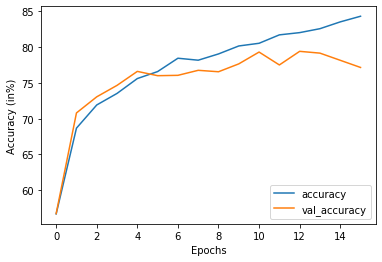

In [52]:
import matplotlib.pyplot as plt
plt.plot([i*100 for i in history.history['accuracy']])
plt.plot([i*100 for i in history.history['val_accuracy']])
plt.legend(['accuracy','val_accuracy'],loc='lower right')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (in%)')
plt.show()

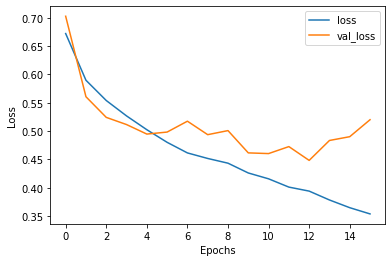

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'],loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()